In [5]:
# Import necessary libraries
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:
# Define paths for train and test data
train_path = "train_test_split/train.json"
test_path = "train_test_split/test.json"

# Load the data
def load_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    texts = [item["text"] for item in data]
    intents = [item["intent"] for item in data]
    return texts, intents

# Load train and test data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Print sample data
print(f"Sample training text: {X_train[0]}")
print(f"Sample training intent: {y_train[0]}")


Sample training text: BOS i want to fly from boston at 838 am and arrive in denver at 1110 in the morning EOS
Sample training intent: flight


Unigram Model - Accuracy: 0.9295, F1-Score: 0.9167
                   precision    recall  f1-score   support

     abbreviation       1.00      0.91      0.95        33
         aircraft       0.47      1.00      0.64         9
          airfare       0.83      0.92      0.87        48
   airfare+flight       0.00      0.00      0.00         1
          airline       1.00      0.87      0.93        38
          airport       1.00      0.78      0.88        18
         capacity       0.88      0.67      0.76        21
             city       1.00      0.33      0.50         6
         day_name       0.00      0.00      0.00         2
         distance       1.00      1.00      1.00        10
           flight       0.94      0.99      0.97       632
   flight+airfare       0.00      0.00      0.00        12
   flight+airline       0.00      0.00      0.00         1
        flight_no       1.00      0.75      0.86         8
flight_no+airline       0.00      0.00      0.00         1
    

C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

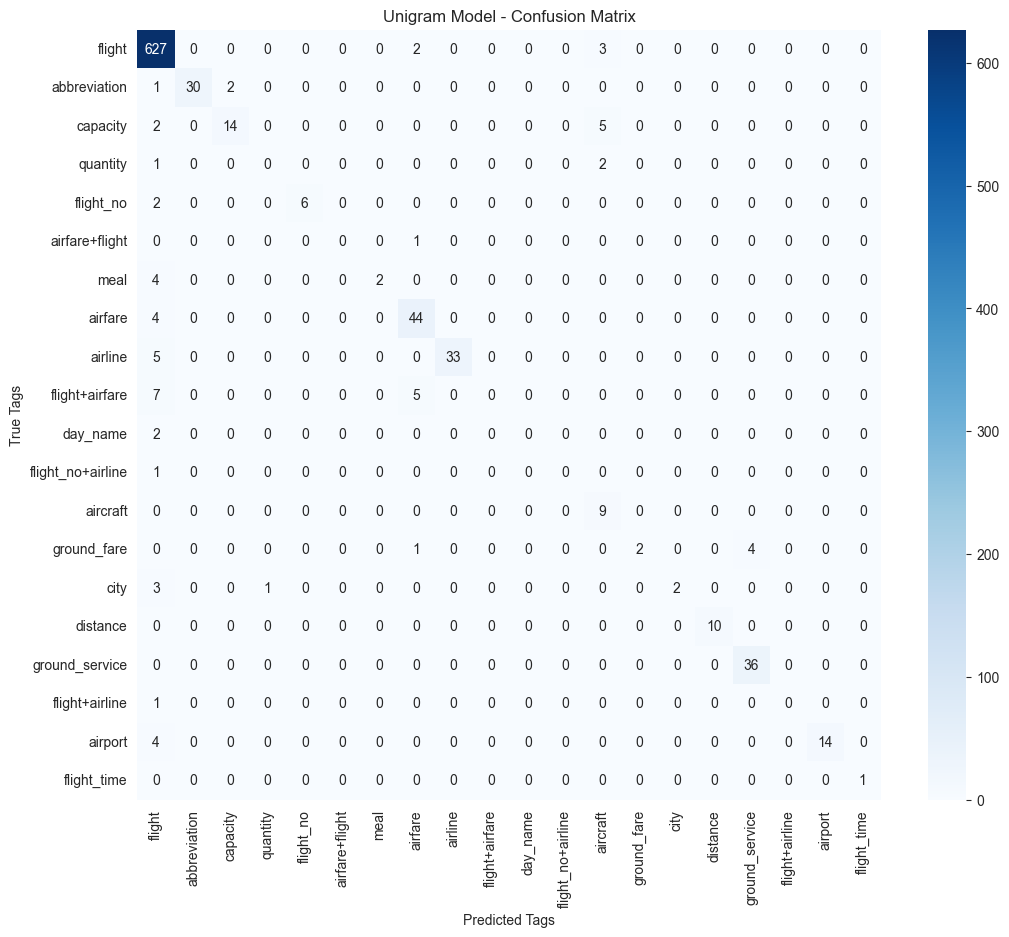

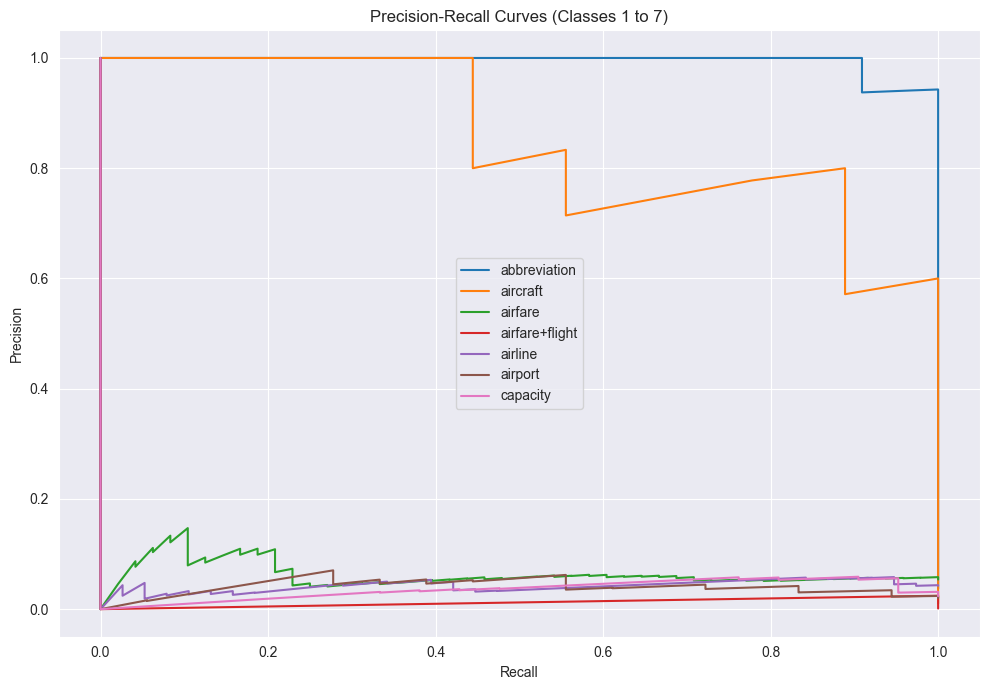

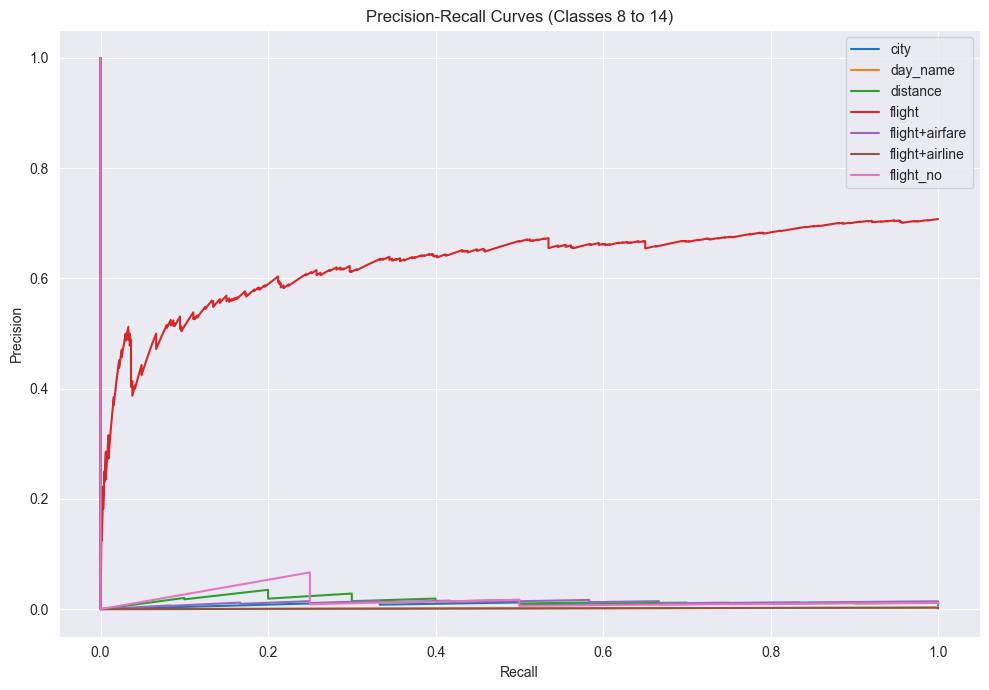

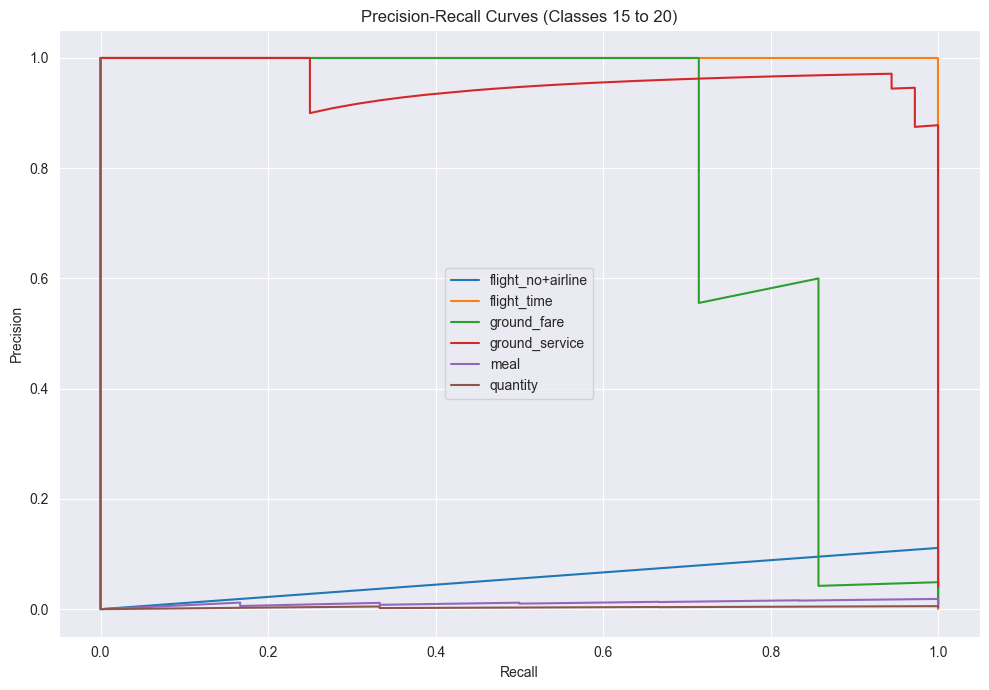

In [8]:
# Unigram TF-IDF
tfidf_uni = TfidfVectorizer(ngram_range=(1, 1), stop_words="english")
X_train_uni = tfidf_uni.fit_transform(X_train)
X_test_uni = tfidf_uni.transform(X_test)

# SVM Model Training for Unigram
svm_uni = LinearSVC()
svm_uni.fit(X_train_uni, y_train)

# Predictions
y_pred_uni = svm_uni.predict(X_test_uni)

# Evaluation
accuracy_uni = accuracy_score(y_test, y_pred_uni)
f1_uni = f1_score(y_test, y_pred_uni, average="weighted")
print(f"Unigram Model - Accuracy: {accuracy_uni:.4f}, F1-Score: {f1_uni:.4f}")
print(classification_report(y_test, y_pred_uni))

# Confusion Matrix for Unigram
conf_matrix_uni = confusion_matrix(y_test, y_pred_uni, labels=list(set(y_test)))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_uni, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Unigram Model - Confusion Matrix')
plt.show()

# Precision-Recall Curve Generation
from sklearn.metrics import precision_recall_curve

# Label Encoding for Binary Relevance Tasks
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_uni)
intent_labels = label_encoder.classes_

# Generate Precision-Recall Curves
num_intents = len(intent_labels)
plots_per_figure = 7  # Number of intents per figure

for i in range(0, num_intents, plots_per_figure):
    plt.figure(figsize=(10, 7))
    for j in range(i, min(i + plots_per_figure, num_intents)):
        intent = intent_labels[j]
        y_true = (y_test_encoded == j).astype(int)

        # Simulating probabilities as LinearSVC does not support predict_proba
        decision_scores = svm_uni.decision_function(X_test_uni)
        if len(intent_labels) == 2:
            decision_scores = decision_scores
        else:
            decision_scores = decision_scores[:, j]

        precision, recall, _ = precision_recall_curve(y_true, decision_scores)
        plt.plot(recall, precision, label=intent)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curves (Classes {i + 1} to {min(i + plots_per_figure, num_intents)})")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Bigram Model - Accuracy: 0.9373, F1-Score: 0.9239
                   precision    recall  f1-score   support

     abbreviation       1.00      0.91      0.95        33
         aircraft       0.64      1.00      0.78         9
          airfare       0.90      0.92      0.91        48
   airfare+flight       0.00      0.00      0.00         1
          airline       1.00      0.92      0.96        38
          airport       1.00      0.94      0.97        18
         capacity       1.00      0.90      0.95        21
             city       1.00      0.50      0.67         6
         day_name       0.00      0.00      0.00         2
         distance       1.00      0.80      0.89        10
           flight       0.94      0.99      0.97       632
   flight+airfare       1.00      0.08      0.15        12
   flight+airline       0.00      0.00      0.00         1
        flight_no       1.00      0.38      0.55         8
flight_no+airline       0.00      0.00      0.00         1
     

C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

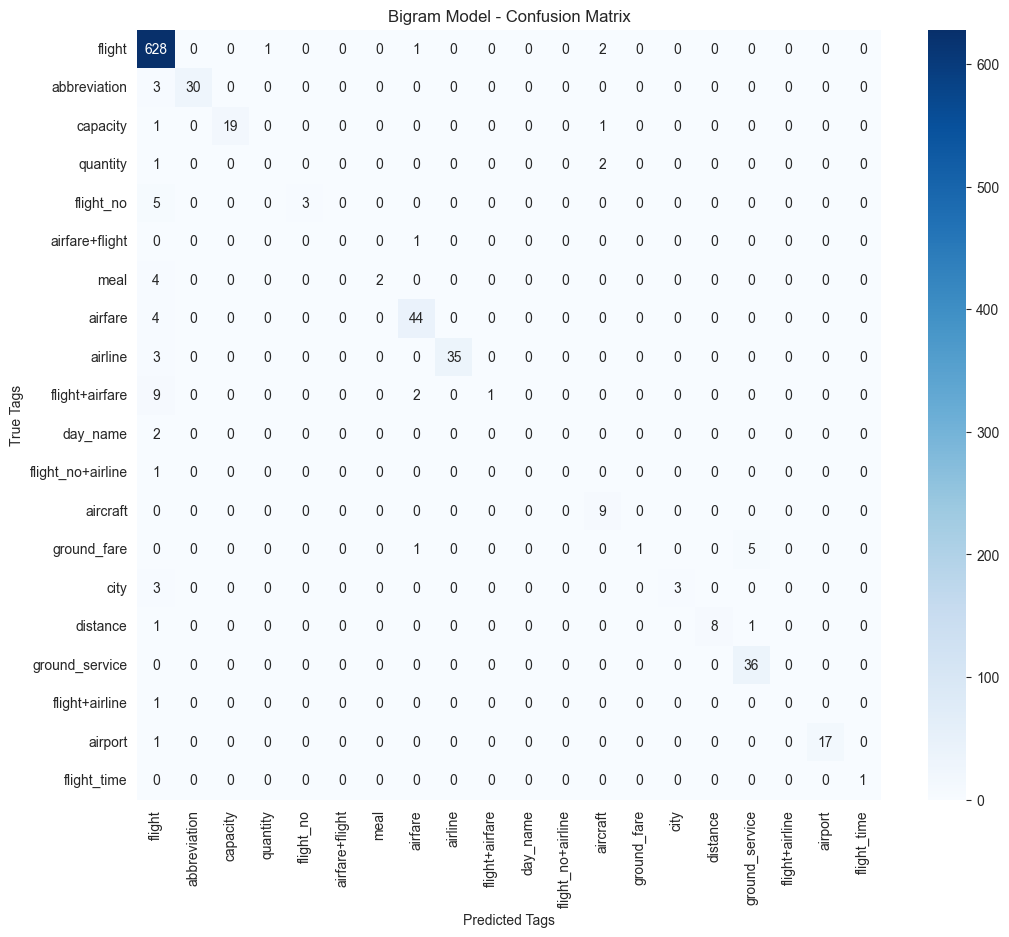

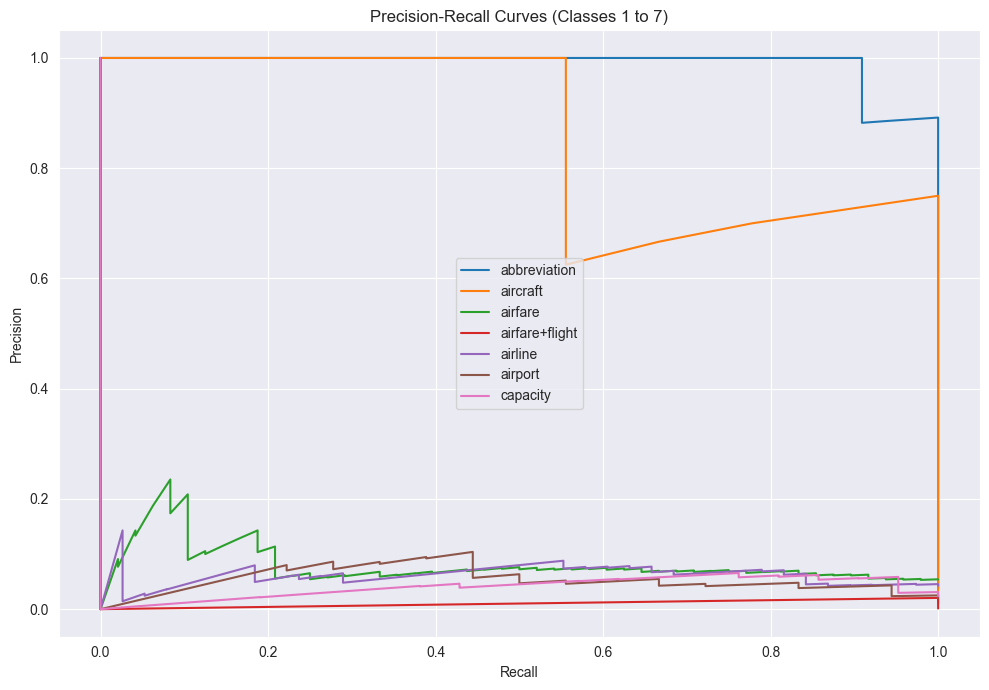

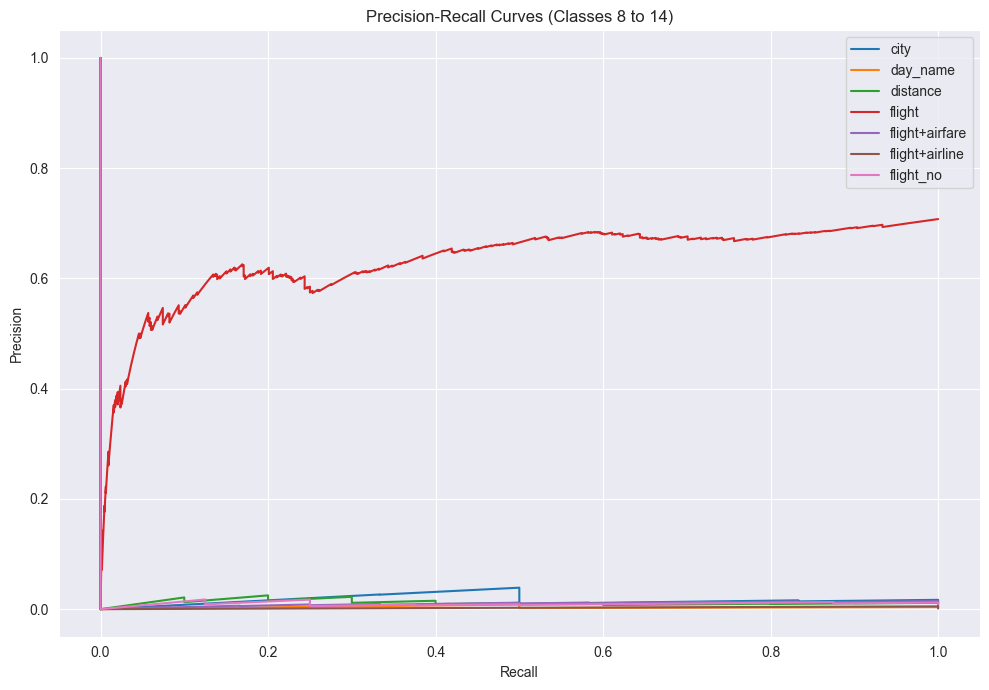

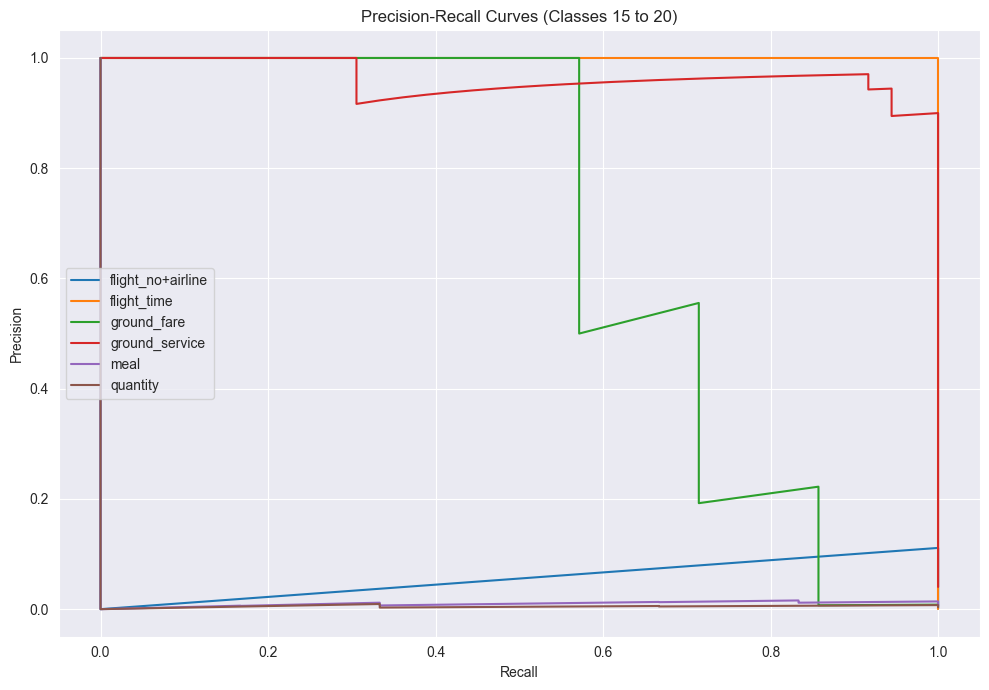

In [6]:
# Bigram TF-IDF
tfidf_bi = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
X_train_bi = tfidf_bi.fit_transform(X_train)
X_test_bi = tfidf_bi.transform(X_test)

# SVM Model Training for Bigram
svm_bi = LinearSVC()
svm_bi.fit(X_train_bi, y_train)

# Predictions
y_pred_bi = svm_bi.predict(X_test_bi)

# Evaluation
accuracy_bi = accuracy_score(y_test, y_pred_bi)
f1_bi = f1_score(y_test, y_pred_bi, average="weighted")
print(f"Bigram Model - Accuracy: {accuracy_bi:.4f}, F1-Score: {f1_bi:.4f}")
print(classification_report(y_test, y_pred_bi))

# Confusion Matrix for Bigram
conf_matrix_bi = confusion_matrix(y_test, y_pred_bi, labels=list(set(y_test)))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_bi, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Bigram Model - Confusion Matrix')
plt.show()

# Precision-Recall Curve Generation
from sklearn.metrics import precision_recall_curve

# Label Encoding for Binary Relevance Tasks
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_bi)
intent_labels = label_encoder.classes_

# Generate Precision-Recall Curves
num_intents = len(intent_labels)
plots_per_figure = 7  # Number of intents per figure

for i in range(0, num_intents, plots_per_figure):
    plt.figure(figsize=(10, 7))
    for j in range(i, min(i + plots_per_figure, num_intents)):
        intent = intent_labels[j]
        y_true = (y_test_encoded == j).astype(int)

        # Simulating probabilities as LinearSVC does not support predict_proba
        decision_scores = svm_bi.decision_function(X_test_bi)
        if len(intent_labels) == 2:
            decision_scores = decision_scores
        else:
            decision_scores = decision_scores[:, j]

        precision, recall, _ = precision_recall_curve(y_true, decision_scores)
        plt.plot(recall, precision, label=intent)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curves (Classes {i + 1} to {min(i + plots_per_figure, num_intents)})")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Trigram Model - Accuracy: 0.9250, F1-Score: 0.9068
                   precision    recall  f1-score   support

     abbreviation       1.00      0.91      0.95        33
         aircraft       0.60      1.00      0.75         9
          airfare       0.90      0.90      0.90        48
   airfare+flight       0.00      0.00      0.00         1
          airline       1.00      0.89      0.94        38
          airport       0.94      0.83      0.88        18
         capacity       1.00      0.81      0.89        21
             city       1.00      0.50      0.67         6
         day_name       0.00      0.00      0.00         2
         distance       1.00      0.70      0.82        10
           flight       0.93      0.99      0.96       632
   flight+airfare       0.00      0.00      0.00        12
   flight+airline       0.00      0.00      0.00         1
        flight_no       1.00      0.38      0.55         8
flight_no+airline       0.00      0.00      0.00         1
    

C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erdem\PycharmProjects\cs411-pp3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

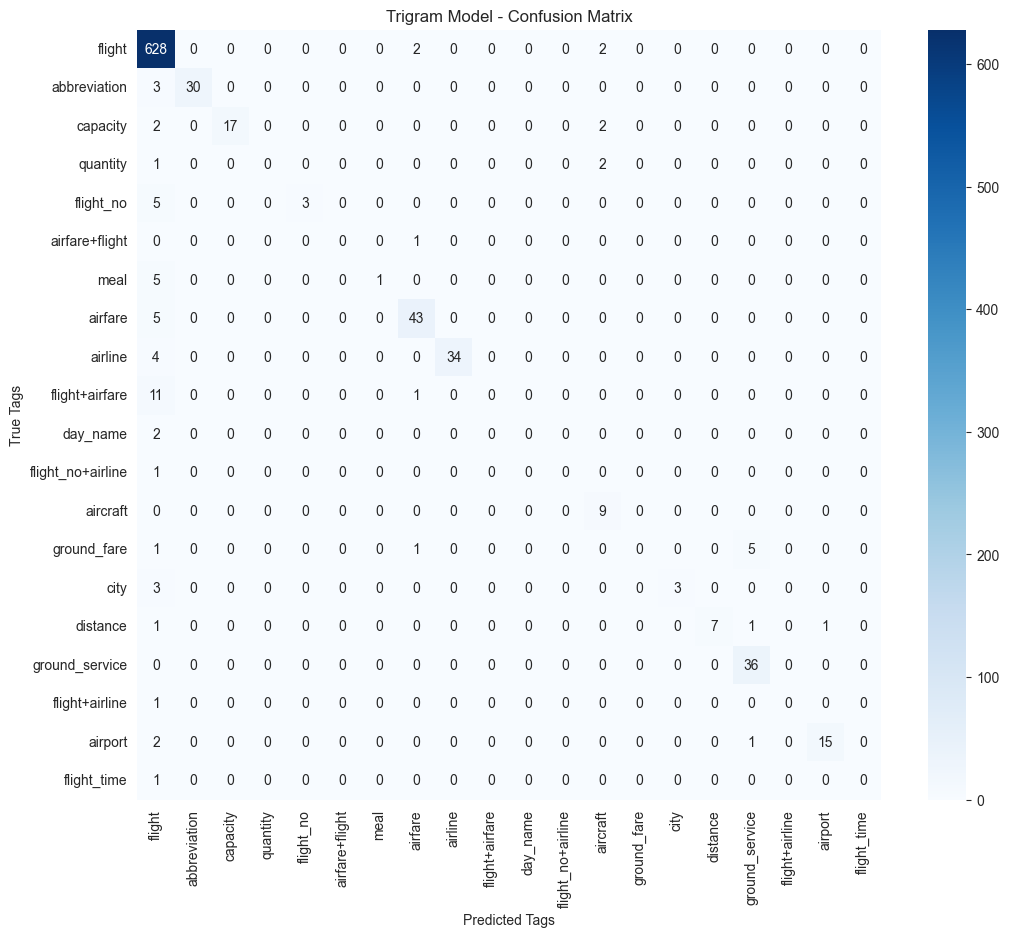

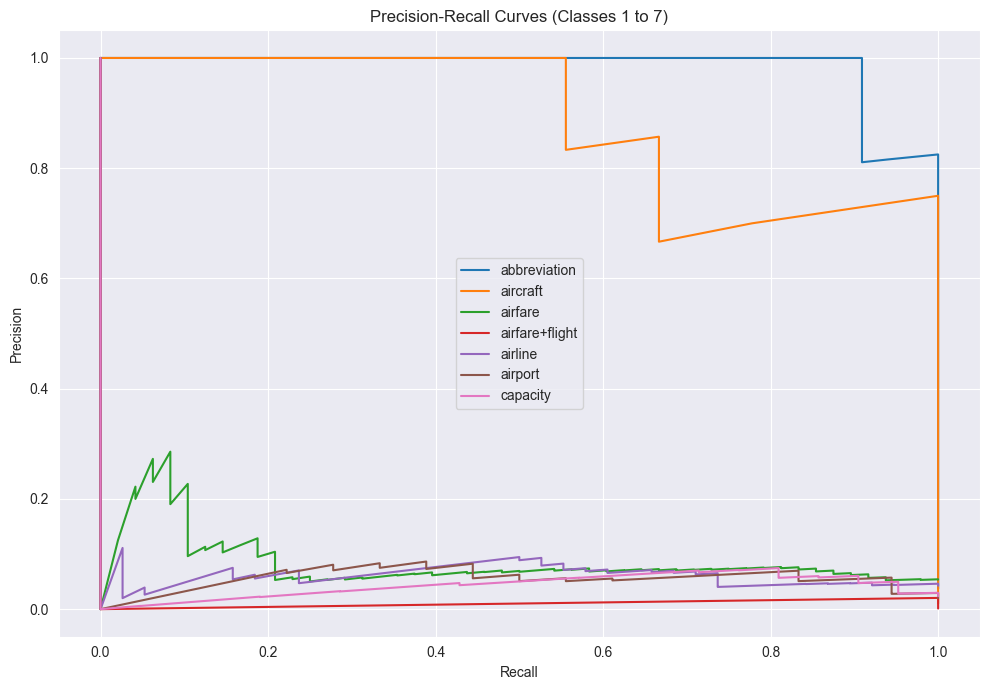

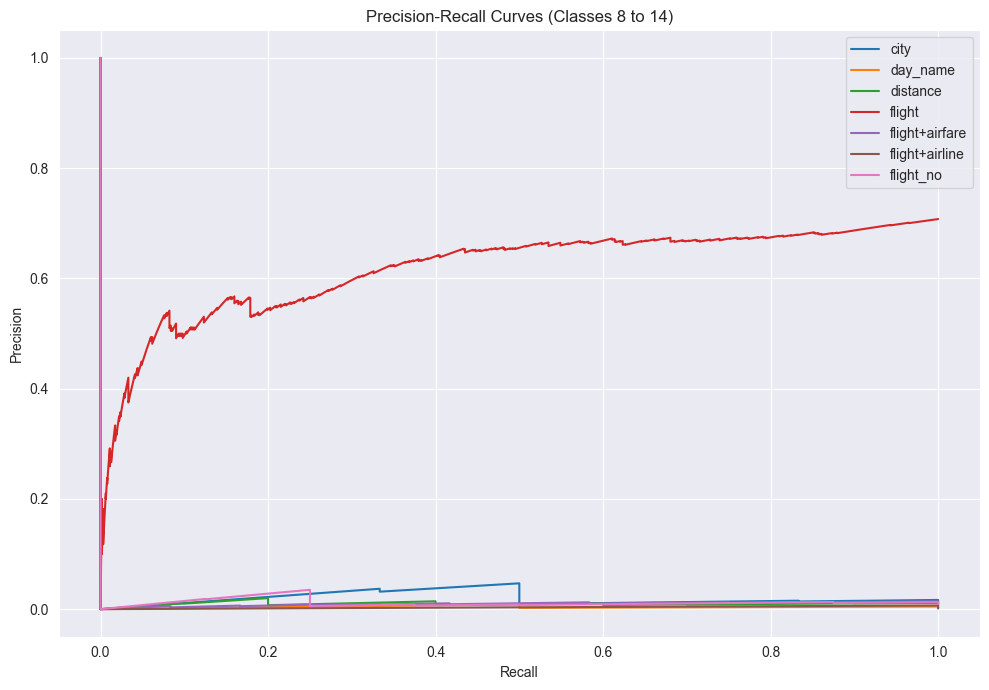

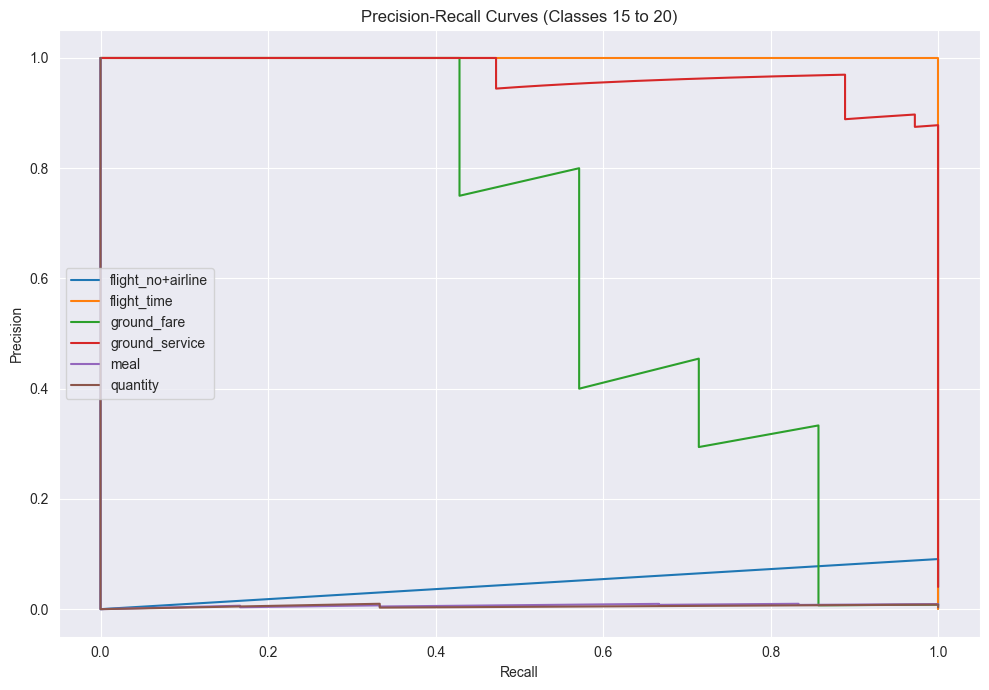

In [7]:
# Trigram TF-IDF
tfidf_tri = TfidfVectorizer(ngram_range=(1, 3), stop_words="english")
X_train_tri = tfidf_tri.fit_transform(X_train)
X_test_tri = tfidf_tri.transform(X_test)

# SVM Model Training for Trigram
svm_tri = LinearSVC()
svm_tri.fit(X_train_tri, y_train)

# Predictions
y_pred_tri = svm_tri.predict(X_test_tri)

# Evaluation
accuracy_tri = accuracy_score(y_test, y_pred_tri)
f1_tri = f1_score(y_test, y_pred_tri, average="weighted")
print(f"Trigram Model - Accuracy: {accuracy_tri:.4f}, F1-Score: {f1_tri:.4f}")
print(classification_report(y_test, y_pred_tri))

# Confusion Matrix for Trigram
conf_matrix_tri = confusion_matrix(y_test, y_pred_tri, labels=list(set(y_test)))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_tri, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Trigram Model - Confusion Matrix')
plt.show()

# Precision-Recall Curve Generation
from sklearn.metrics import precision_recall_curve

# Label Encoding for Binary Relevance Tasks
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_tri)
intent_labels = label_encoder.classes_

# Generate Precision-Recall Curves
num_intents = len(intent_labels)
plots_per_figure = 7  # Number of intents per figure

for i in range(0, num_intents, plots_per_figure):
    plt.figure(figsize=(10, 7))
    for j in range(i, min(i + plots_per_figure, num_intents)):
        intent = intent_labels[j]
        y_true = (y_test_encoded == j).astype(int)

        # Simulating probabilities as LinearSVC does not support predict_proba
        decision_scores = svm_tri.decision_function(X_test_tri)
        if len(intent_labels) == 2:
            decision_scores = decision_scores
        else:
            decision_scores = decision_scores[:, j]

        precision, recall, _ = precision_recall_curve(y_true, decision_scores)
        plt.plot(recall, precision, label=intent)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curves (Classes {i + 1} to {min(i + plots_per_figure, num_intents)})")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


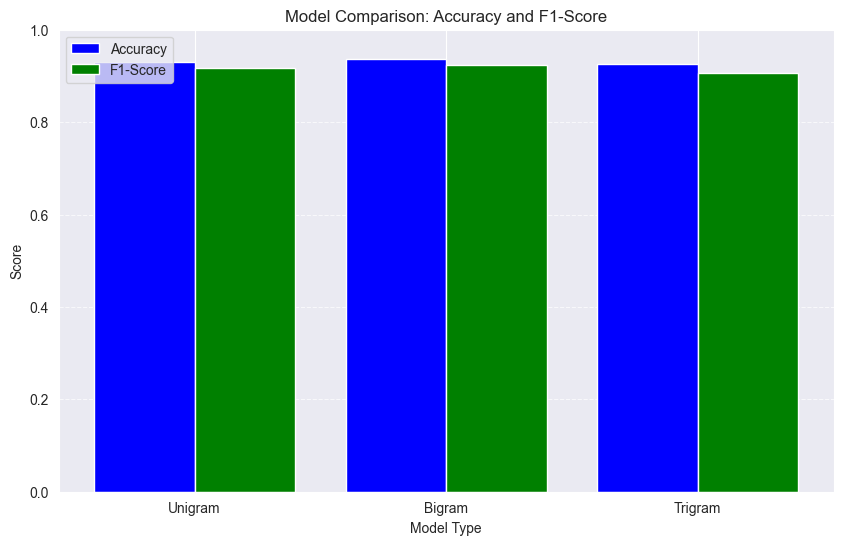

In [12]:
import numpy as np

# Data for visualization
results = {
    "Model": ["Unigram", "Bigram", "Trigram"],
    "Accuracy": [accuracy_uni, accuracy_bi, accuracy_tri],
    "F1-Score": [f1_uni, f1_bi, f1_tri]
}

# Convert to numpy arrays for easier manipulation
models = np.arange(len(results["Model"]))  # [0, 1, 2]
accuracy = results["Accuracy"]
f1_scores = results["F1-Score"]

# Bar width for separation
bar_width = 0.4

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models - bar_width/2, accuracy, bar_width, label="Accuracy", color="blue")
plt.bar(models + bar_width/2, f1_scores, bar_width, label="F1-Score", color="green")

# Add labels and title
plt.xticks(models, results["Model"])  # Add model names to x-axis
plt.title("Model Comparison: Accuracy and F1-Score")
plt.ylabel("Score")
plt.xlabel("Model Type")
plt.ylim(0, 1.0)
plt.legend(loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
